### Chella Thiyagarajan N
ME17B179
5th Question 
part b and c

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm

In [47]:
import operator as op
from functools import reduce

def comb(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

In [48]:
def get_probab(state, action, new_state):
  probab = 0
  for k in range(max(0, (state+new_state)-100), min(state, new_state)+1):
    if action == 'a1':
      probab += (comb(state, k)*((0.25)**k)*(0.75**(state-k))) * \
                  (comb(100-state, new_state-k)*((0.6)**(new_state-k))*(0.4**((100-state)-(new_state-k))))
    else:
      probab += (comb(state, k)*((0.75)**k)*(0.25**(state-k))) * \
                  (comb(100-state, new_state-k)*((0.2)**(new_state-k))*(0.8**((100-state)-(new_state-k))))
  return probab

In [49]:
def get_reward(state, action):
  if action == 'a1':
    reward = (-5000+7500)*state + 10000*(100-state)
  else:
    reward = (-5000+20000)*(100-state) + 2500*state
  return reward

In [65]:
# Initialization
values = [0]*101
actions = ['a1', 'a2']
greedy_policy = dict()
for state in range(0, 101):
  reward = []
  for action in actions:
    reward.append(get_reward(state, action))
  greedy_policy[state] = actions[np.argmax(np.array(reward))]
policy = greedy_policy.copy()
gamma = 0.9

In [66]:
%%time
# Policy Iteration

all_values = []
not_done = True
while(not_done):
  vi_not_done = True
  while(vi_not_done):
    delta = 0
    for state in range(0, 101):
      j = values[state]

      value = 0
      for new_state in range(0, 101):
        value += get_probab(state, policy[state], new_state)*(get_reward(state, policy[state]) + gamma*values[new_state])
      values[state] = value

      delta = max(delta, abs(j - values[state]))
    if(delta < 1e-8):
      vi_not_done = False
  not_done = False
  for state in range(0, 101):
    b = policy[state]

    action_values = []
    for action in actions:
      reward = 0
      for new_state in range(0, 101):
        reward += get_probab(state, action, new_state)*(get_reward(state, action) + gamma*values[new_state])
      action_values.append(reward)
    policy[state] = actions[np.argmax(np.array(action_values))]

    if(b != policy[state]):
      not_done = True
  all_values.append(values.copy())

CPU times: user 6min 51s, sys: 832 ms, total: 6min 51s
Wall time: 6min 53s


In [67]:
# Policy That we got from Policy Iteration
policy

{0: 'a2',
 1: 'a2',
 2: 'a2',
 3: 'a2',
 4: 'a2',
 5: 'a2',
 6: 'a2',
 7: 'a2',
 8: 'a2',
 9: 'a2',
 10: 'a2',
 11: 'a2',
 12: 'a2',
 13: 'a2',
 14: 'a2',
 15: 'a2',
 16: 'a2',
 17: 'a2',
 18: 'a2',
 19: 'a2',
 20: 'a2',
 21: 'a2',
 22: 'a2',
 23: 'a2',
 24: 'a2',
 25: 'a2',
 26: 'a2',
 27: 'a2',
 28: 'a2',
 29: 'a2',
 30: 'a2',
 31: 'a2',
 32: 'a2',
 33: 'a2',
 34: 'a2',
 35: 'a2',
 36: 'a2',
 37: 'a2',
 38: 'a2',
 39: 'a2',
 40: 'a2',
 41: 'a2',
 42: 'a2',
 43: 'a2',
 44: 'a2',
 45: 'a2',
 46: 'a2',
 47: 'a2',
 48: 'a2',
 49: 'a2',
 50: 'a2',
 51: 'a2',
 52: 'a2',
 53: 'a2',
 54: 'a2',
 55: 'a2',
 56: 'a1',
 57: 'a1',
 58: 'a1',
 59: 'a1',
 60: 'a1',
 61: 'a1',
 62: 'a1',
 63: 'a1',
 64: 'a1',
 65: 'a1',
 66: 'a1',
 67: 'a1',
 68: 'a1',
 69: 'a1',
 70: 'a1',
 71: 'a1',
 72: 'a1',
 73: 'a1',
 74: 'a1',
 75: 'a1',
 76: 'a1',
 77: 'a1',
 78: 'a1',
 79: 'a1',
 80: 'a1',
 81: 'a1',
 82: 'a1',
 83: 'a1',
 84: 'a1',
 85: 'a1',
 86: 'a1',
 87: 'a1',
 88: 'a1',
 89: 'a1',
 90: 'a1',
 91: 'a1'

In [55]:
# Initialization
values = [0]*101
actions = ['a1', 'a2']
policy = {x:0 for x in range(0,101)}

In [56]:
%%time
# Value Iteration

all_values = []
not_done = True
while(not_done):
  delta = 0
  H = dict()
  for state in range(0,101):

    action_values = []
    for action in actions:
      reward = 0
      for new_state in range(0, 101):
        reward += get_probab(state, action, new_state)*(get_reward(state, action) + gamma*values[new_state])
      action_values.append(reward)
    H[state] = np.max(np.array(action_values))
    policy[state] = actions[np.argmax(np.array(action_values))]

    delta = max(delta, abs(values[state] - H[state]))
  for state in range(0, 101):
    values[state] = H[state]
  if(delta < 0.1):
    not_done = False
  all_values.append(values.copy())

CPU times: user 6min 30s, sys: 752 ms, total: 6min 30s
Wall time: 6min 31s


In [57]:
# Policy That we got from Value Iteration
policy

{0: 'a2',
 1: 'a2',
 2: 'a2',
 3: 'a2',
 4: 'a2',
 5: 'a2',
 6: 'a2',
 7: 'a2',
 8: 'a2',
 9: 'a2',
 10: 'a2',
 11: 'a2',
 12: 'a2',
 13: 'a2',
 14: 'a2',
 15: 'a2',
 16: 'a2',
 17: 'a2',
 18: 'a2',
 19: 'a2',
 20: 'a2',
 21: 'a2',
 22: 'a2',
 23: 'a2',
 24: 'a2',
 25: 'a2',
 26: 'a2',
 27: 'a2',
 28: 'a2',
 29: 'a2',
 30: 'a2',
 31: 'a2',
 32: 'a2',
 33: 'a2',
 34: 'a2',
 35: 'a2',
 36: 'a2',
 37: 'a2',
 38: 'a2',
 39: 'a2',
 40: 'a2',
 41: 'a2',
 42: 'a2',
 43: 'a2',
 44: 'a2',
 45: 'a2',
 46: 'a2',
 47: 'a2',
 48: 'a2',
 49: 'a2',
 50: 'a2',
 51: 'a2',
 52: 'a2',
 53: 'a2',
 54: 'a2',
 55: 'a2',
 56: 'a1',
 57: 'a1',
 58: 'a1',
 59: 'a1',
 60: 'a1',
 61: 'a1',
 62: 'a1',
 63: 'a1',
 64: 'a1',
 65: 'a1',
 66: 'a1',
 67: 'a1',
 68: 'a1',
 69: 'a1',
 70: 'a1',
 71: 'a1',
 72: 'a1',
 73: 'a1',
 74: 'a1',
 75: 'a1',
 76: 'a1',
 77: 'a1',
 78: 'a1',
 79: 'a1',
 80: 'a1',
 81: 'a1',
 82: 'a1',
 83: 'a1',
 84: 'a1',
 85: 'a1',
 86: 'a1',
 87: 'a1',
 88: 'a1',
 89: 'a1',
 90: 'a1',
 91: 'a1'

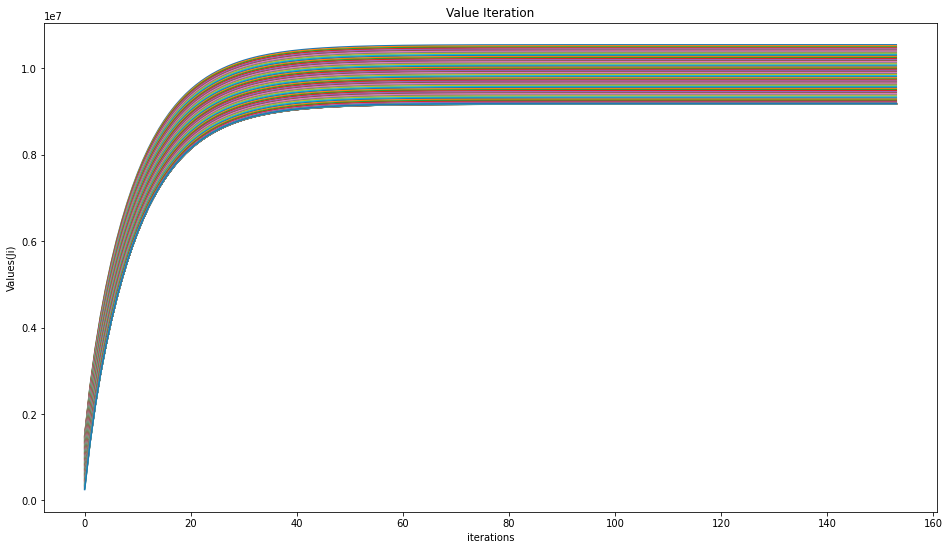

In [58]:
# plot values of all 100 states vs iterations
plt.figure(figsize=(16,9))
iter_values = {x:[] for x in range(0,101)}
for values in all_values:
  for state,value in enumerate(values):
    iter_values[state].append(value)
for state in range(0,101):
  plt.plot(range(len(iter_values[state])), iter_values[state], label=state)

plt.xlabel('iterations')
plt.ylabel('Values(Ji)')
plt.title('Value Iteration')
plt.show()

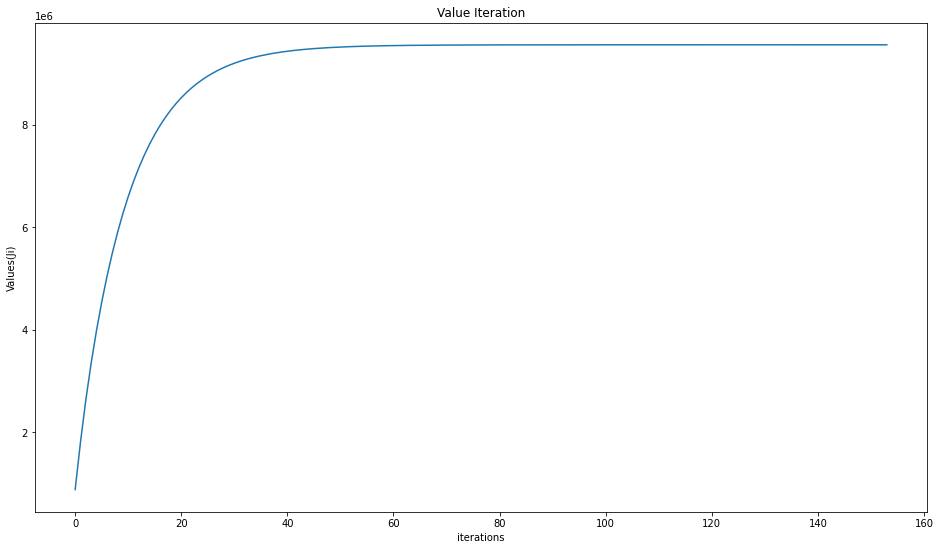

In [59]:
# plot mean of all 100 state values vs iterations
plt.figure(figsize=(16,9))
iter_values = []
for values in all_values:
  iter_values.append(np.mean(np.array(values)))
plt.plot(range(len(iter_values)), iter_values)
plt.xlabel('iterations')
plt.ylabel('Values(Ji)')
plt.title('Value Iteration')
plt.show()

In [60]:
# Initialization
values = [0]*101
actions = ['a1', 'a2']
policy = {x:0 for x in range(0,101)}

In [61]:
%%time
# Gauss Seidel

all_values = []
not_done = True
while(not_done):
  delta = 0
  for state in range(0,101):
    j = values[state]

    action_values = []
    for action in actions:
      reward = 0
      for new_state in range(0, 101):
        reward += get_probab(state, action, new_state)*(get_reward(state, action) + gamma*values[new_state])
      action_values.append(reward)
    values[state] = np.max(np.array(action_values))
    policy[state] = actions[np.argmax(np.array(action_values))]

    delta = max(delta, abs(j - values[state]))
  if(delta < 0.1):
    not_done = False
  all_values.append(values.copy())

CPU times: user 3min 55s, sys: 460 ms, total: 3min 55s
Wall time: 3min 56s


In [62]:
# Policy That we got from Gauss Seidel
policy

{0: 'a2',
 1: 'a2',
 2: 'a2',
 3: 'a2',
 4: 'a2',
 5: 'a2',
 6: 'a2',
 7: 'a2',
 8: 'a2',
 9: 'a2',
 10: 'a2',
 11: 'a2',
 12: 'a2',
 13: 'a2',
 14: 'a2',
 15: 'a2',
 16: 'a2',
 17: 'a2',
 18: 'a2',
 19: 'a2',
 20: 'a2',
 21: 'a2',
 22: 'a2',
 23: 'a2',
 24: 'a2',
 25: 'a2',
 26: 'a2',
 27: 'a2',
 28: 'a2',
 29: 'a2',
 30: 'a2',
 31: 'a2',
 32: 'a2',
 33: 'a2',
 34: 'a2',
 35: 'a2',
 36: 'a2',
 37: 'a2',
 38: 'a2',
 39: 'a2',
 40: 'a2',
 41: 'a2',
 42: 'a2',
 43: 'a2',
 44: 'a2',
 45: 'a2',
 46: 'a2',
 47: 'a2',
 48: 'a2',
 49: 'a2',
 50: 'a2',
 51: 'a2',
 52: 'a2',
 53: 'a2',
 54: 'a2',
 55: 'a2',
 56: 'a1',
 57: 'a1',
 58: 'a1',
 59: 'a1',
 60: 'a1',
 61: 'a1',
 62: 'a1',
 63: 'a1',
 64: 'a1',
 65: 'a1',
 66: 'a1',
 67: 'a1',
 68: 'a1',
 69: 'a1',
 70: 'a1',
 71: 'a1',
 72: 'a1',
 73: 'a1',
 74: 'a1',
 75: 'a1',
 76: 'a1',
 77: 'a1',
 78: 'a1',
 79: 'a1',
 80: 'a1',
 81: 'a1',
 82: 'a1',
 83: 'a1',
 84: 'a1',
 85: 'a1',
 86: 'a1',
 87: 'a1',
 88: 'a1',
 89: 'a1',
 90: 'a1',
 91: 'a1'

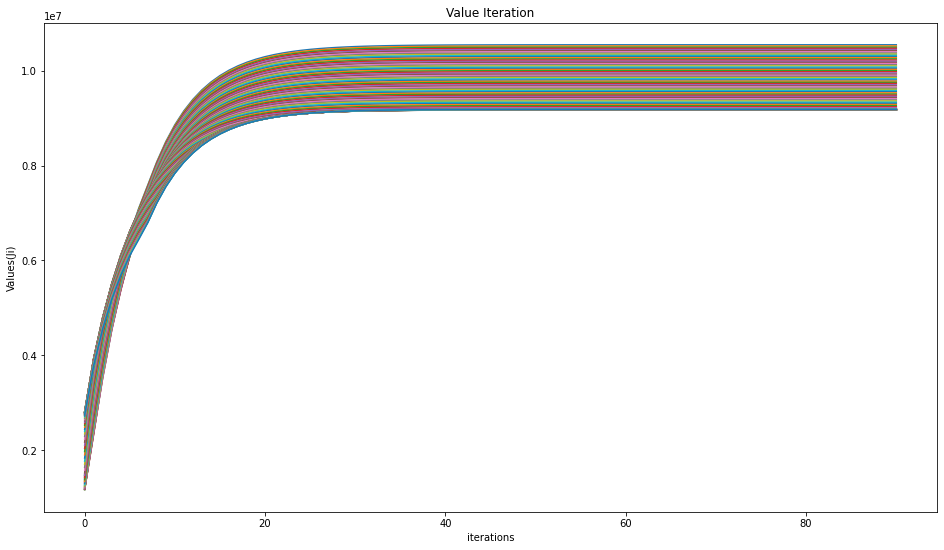

In [63]:
# plot values of all 100 states vs iterations
plt.figure(figsize=(16,9))
iter_values = {x:[] for x in range(0,101)}
for values in all_values:
  for state,value in enumerate(values):
    iter_values[state].append(value)
for state in range(0,101):
  plt.plot(range(len(iter_values[state])), iter_values[state], label=state)

plt.xlabel('iterations')
plt.ylabel('Values(Ji)')
plt.title('Value Iteration')
plt.show()

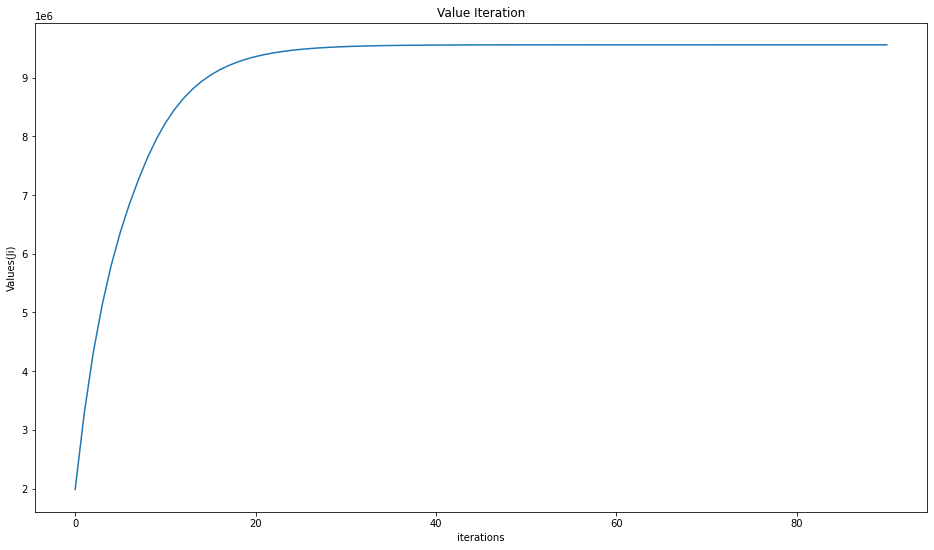

In [64]:
# plot mean of all 100 state values vs iterations
plt.figure(figsize=(16,9))
iter_values = []
for values in all_values:
  iter_values.append(np.mean(np.array(values)))
plt.plot(range(len(iter_values)), iter_values)
plt.xlabel('iterations')
plt.ylabel('Values(Ji)')
plt.title('Value Iteration')
plt.show()